In [0]:
import scipy.fftpack as fft
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt 
import numpy as np
from scipy.signal import get_window
import math

In [0]:
# !pip install hmmlearn==0.1.1
# !pip install pydub
# !pip install eyeD3==0.8.1
# !sudo apt-get install ffmpeg
# !sudo apt-get install python3-magic
# !pip install python-magic
# !pip install pyAudioAnalysis

In [0]:
from google.colab import files
uploaded = files.upload()

Saving 0001.wav to 0001.wav


In [0]:
from google.colab import files
uploaded = files.upload()

Saving 0002.wav to 0002.wav


In [0]:
(sample_rate1,audio1) = wav.read("0001.wav") ## Apple sound First
(sample_rate2,audio2) = wav.read("0002.wav") ## Apple sound Second
print(audio1[0 :100])
print(audio2[0 :100])
print(audio1.shape)
print(audio2.shape)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
  0  0  0  0  0  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -2 -2
 -2 -2 -2 -2]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2]
(37600,)
(29600,)


In [0]:
print("sample_rate1 :", sample_rate1)
print("audio1 size :",audio1.size)
print("Time Duration : ",audio1.size/float(sample_rate1))
print("sample_rate2 :", sample_rate2)
print("audio2 size :",audio2.size)
print("Time Duration : ",audio2.size/float(sample_rate2))


sample_rate1 : 16000
audio1 size : 37600
Time Duration :  2.35
sample_rate2 : 16000
audio2 size : 29600
Time Duration :  1.85


In [0]:
t1 = np.arange(audio1.size)/float(sample_rate1)
t2 = np.arange(audio2.size)/float(sample_rate2)


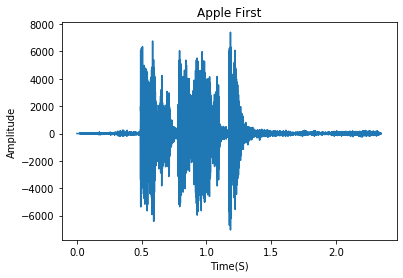

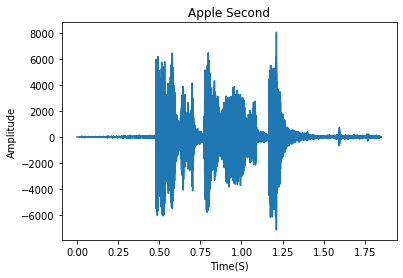

In [0]:
plt.plot(t1,audio1)
plt.title("Apple First")
plt.xlabel("Time(S)")
plt.ylabel("Amplitude")
plt.show()
plt.plot(t2,audio2)
plt.title("Apple Second")
plt.xlabel("Time(S)")
plt.ylabel("Amplitude")
plt.show()

In [0]:
first = np.array([])
second = np.array([])
for i in audio1:
  if i > 2200 or i < -2200:
    first = np.append(first,i)
  else:
    first = np.append(first,0)
for i in audio2:
  if i > 2200 or i < -2200:
    second = np.append(second,i)
  else:
    second = np.append(second,0)

print(first.shape)
print(second.shape)


(37600,)
(29600,)


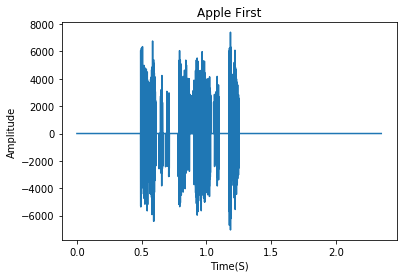

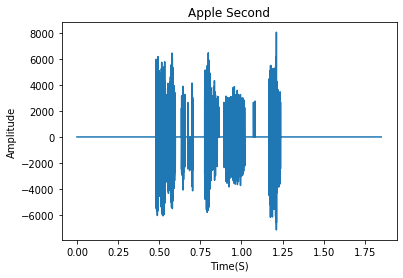

In [0]:
plt.plot(t1,first)
plt.title("Apple First")
plt.xlabel("Time(S)")
plt.ylabel("Amplitude")
plt.show()
plt.plot(t2,second)
plt.title("Apple Second")
plt.xlabel("Time(S)")
plt.ylabel("Amplitude")
plt.show()

In [0]:
def normalize_audio(audio):
    audio = audio / np.max(np.abs(audio))
    return audio

#normalization


In [0]:
normalized_signal1 = normalize_audio(first)
normalized_signal2 = normalize_audio(second)


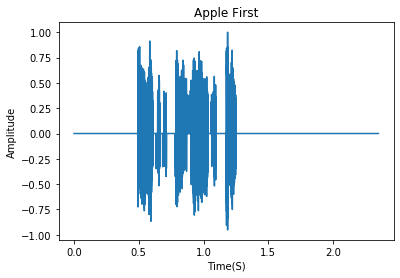

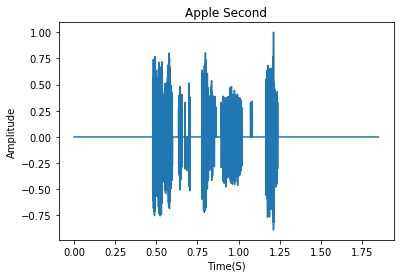

In [0]:
plt.plot(t1,normalized_signal1)
plt.title("Apple First")
plt.xlabel("Time(S)")
plt.ylabel("Amplitude")
plt.show()
plt.plot(t2,normalized_signal2)
plt.title("Apple Second")
plt.xlabel("Time(S)")
plt.ylabel("Amplitude")
plt.show()


#Framing
An audio signal is assumed to be changing contantly.so to simplify things we assume that on short time scales the audio signal doesn't change much (when we say it doesn't change, we mean statistically i.e. statistically stationary, obviously the samples are constantly changing on even short time scales). Typical frame sizes in speech processing range from 20 ms to 40 ms with 50% (+/-10%) overlap between consecutive frames. Popular settings are 25 ms for the frame size
      frame_size = 0.025
      frame_stride = 0.01(10ms)
The step between successive frames in seconds is called frame_stride. Default is0.02s (means no overlap)

In [0]:
def frame_audio(audio, FFT_size=2048, hop_size=10, sample_rate=16000):
    # hop_size in ms
    
    audio = np.pad(audio, int(FFT_size / 2), mode='reflect')
    frame_len = np.round(sample_rate * hop_size / 1000).astype(int)
    frame_num = int((len(audio) - FFT_size) / frame_len) + 1
    frames = np.zeros((frame_num,FFT_size))
    
    for n in range(frame_num):
        frames[n] = audio[n*frame_len:n*frame_len+FFT_size]
    
    return frames


In [0]:
hop_size = 15 #ms
FFT_size = 2048

audio_framed1 = frame_audio(normalized_signal1, FFT_size=FFT_size, hop_size=hop_size, sample_rate=sample_rate1)
print("Framed audio shape1: {0}".format(audio_framed1.shape))
audio_framed2 = frame_audio(normalized_signal2, FFT_size=FFT_size, hop_size=hop_size, sample_rate=sample_rate2)
print("Framed audio shape2: {0}".format(audio_framed2.shape))

Framed audio shape1: (157, 2048)
Framed audio shape2: (124, 2048)


Now we have framed audio matrix with the size of frame number X FFT size.


In [0]:
print("First frame of first audio signal:")
audio_framed1[1]


First frame of first audio signal:


array([0., 0., 0., ..., 0., 0., 0.])

In [0]:
print("second frame of second audio signal:")
audio_framed2[2]


second frame of second audio signal:


array([0., 0., 0., ..., 0., 0., 0.])

In [0]:
print("Last frame:")
audio_framed1[-1]

Last frame:


array([0., 0., 0., ..., 0., 0., 0.])

In [0]:
print("Last frame:")
audio_framed2[-1]

Last frame:


array([0., 0., 0., ..., 0., 0., 0.])

By framing the signal we assured the audio to be periodic. To make the audio continues, we apply a window function on every frame. If we wont do that, We will get high frequency distortions. To overcome this, we first need to apply a window function to the framed audio and then perform FFT. The window assures that both ends of the signal will end close to zero. we apply a window function such as the Hamming window to each frame. A Hamming window has the following form:

    w[n] = 0.54 -0.46cos(2πn/N-1)
    where, 0≤n≤N−1, N is the window length

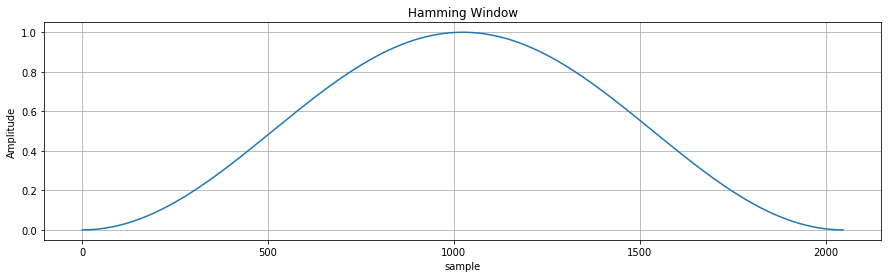

In [0]:
window = get_window("hann", FFT_size, fftbins=True)
plt.figure(figsize=(15,4))
plt.title("Hamming Window")
plt.xlabel("sample")
plt.ylabel("Amplitude")
plt.plot(window)
plt.grid(True)

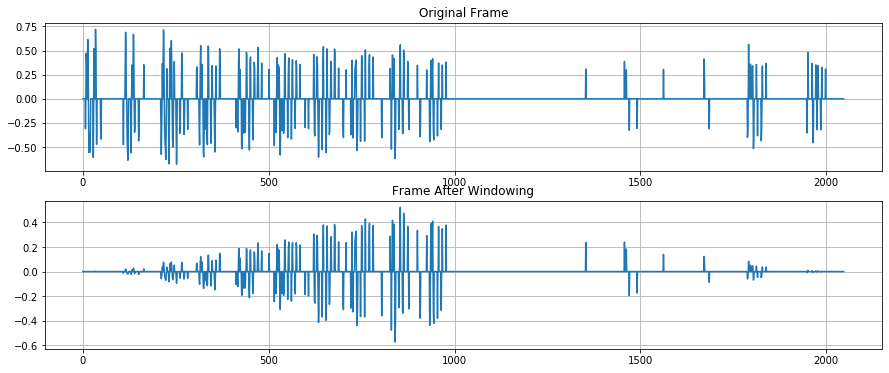

In [0]:
audio_win1 = audio_framed1 * window

ind = 69
plt.figure(figsize=(15,6))
plt.subplot(2, 1, 1)
plt.plot(audio_framed1[ind])
plt.title('Original Frame')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(audio_win1[ind])
plt.title('Frame After Windowing')
plt.grid(True)


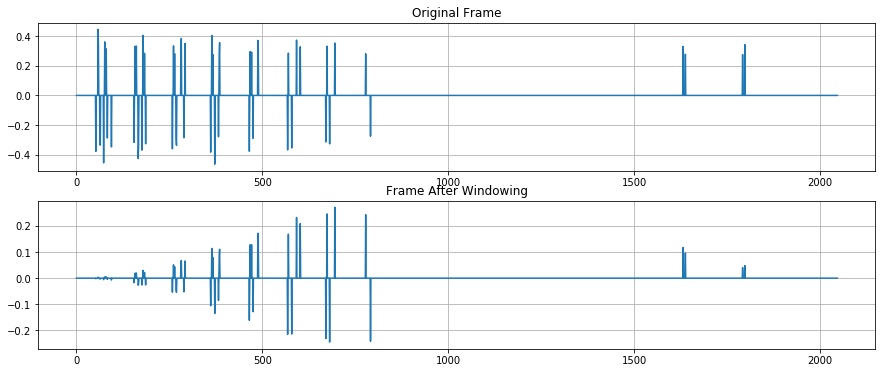

In [0]:
audio_win2 = audio_framed2 * window

ind = 69
plt.figure(figsize=(15,6))
plt.subplot(2, 1, 1)
plt.plot(audio_framed2[ind])
plt.title('Original Frame')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(audio_win2[ind])
plt.title('Frame After Windowing')
plt.grid(True)


In the plot above both ends of the frame end on different places on the y axis. window brought the edges of each frame closer to zero. Now lets perform the FFT.We can now do an N-point FFT on each frame to calculate the frequency spectrum, which is also called Short-Time Fourier-Transform (STFT), where N is typically 256 or 512, NFFT = 512.


In [0]:
audio_winT1 = np.transpose(audio_win1)

audio_fft1 = np.empty((int(1 + FFT_size // 2), audio_winT1.shape[1]), dtype=np.complex64, order='F')

for n in range(audio_fft1.shape[1]):
    audio_fft1[:, n] = fft.fft(audio_winT1[:, n], axis=0)[:audio_fft1.shape[0]]

audio_fft1= np.transpose(audio_fft1)

In [0]:
audio_winT2 = np.transpose(audio_win2)

audio_fft2 = np.empty((int(1 + FFT_size // 2), audio_winT2.shape[1]), dtype=np.complex64, order='F')

for n in range(audio_fft2.shape[1]):
    audio_fft2[:, n] = fft.fft(audio_winT2[:, n], axis=0)[:audio_fft2.shape[0]]

audio_fft2= np.transpose(audio_fft2)

#Calculate signal power

In [0]:
audio_power1 = np.square(np.abs(audio_fft1))
print(audio_power1.shape)
audio_power2 = np.square(np.abs(audio_fft2))
print(audio_power2.shape)

(157, 1025)
(124, 1025)


# MEL-spaced filterbank
Here we compute the MEL-spaced filterbank and then pass the framed audio through them. That will give us information about the power in each frequency band. The filters can be constructed for any frequency band but for our example we will look on the entire sampled band. What spessial with the MEL-spaced filterbank is the spacing between the filters which grows exponentially with frequency. The filterbank can be made for any frequency band. Here we will compute the filterbank for the entire frequency band.

In [0]:
freq_min = 0
freq_high1 = sample_rate1 / 2
freq_high2 = sample_rate2/2
mel_filter_num = 10

print("Minimum frequency  of first audio signal: {0}".format(freq_min))
print("Maximum frequency first audio signal: {0}".format(freq_high1))
print("Minimum frequency second audio signal: {0}".format(freq_min))
print("Maximum frequency second audio signal: {0}".format(freq_high2))

Minimum frequency  of first audio signal: 0
Maximum frequency first audio signal: 8000.0
Minimum frequency second audio signal: 0
Maximum frequency second audio signal: 8000.0


#Compute filter points

In [0]:
def freq_to_mel(freq):
    return 2595.0 * np.log10(1.0 + freq / 700.0)

def met_to_freq(mels):
    return 700.0 * (10.0**(mels / 2595.0) - 1.0)


In [0]:
def get_filter_points(fmin, fmax, mel_filter_num, FFT_size, sample_rate=16000):
    fmin_mel = freq_to_mel(fmin)
    fmax_mel = freq_to_mel(fmax)
    
    print("MEL min: {0}".format(fmin_mel))
    print("MEL max: {0}".format(fmax_mel))
    
    mels = np.linspace(fmin_mel, fmax_mel, num=mel_filter_num+2)
    freqs = met_to_freq(mels)
    
    return np.floor((FFT_size + 1) / sample_rate * freqs).astype(int), freqs


In [0]:
filter_points1, mel_freqs1 = get_filter_points(freq_min, freq_high1, mel_filter_num, FFT_size, sample_rate=16000)
filter_points1


MEL min: 0.0
MEL max: 2840.023046708319


array([   0,   23,   52,   88,  134,  192,  264,  355,  470,  614,  796,
       1024])

In [0]:
filter_points2, mel_freqs2 = get_filter_points(freq_min, freq_high2, mel_filter_num, FFT_size, sample_rate=44100)
filter_points2


MEL min: 0.0
MEL max: 2840.023046708319


array([  0,   8,  18,  32,  48,  69,  96, 129, 170, 223, 288, 371])

#Construct the filterbank
After we have the filter points, we construct the filters.


In [0]:
def get_filters(filter_points, FFT_size):
    filters = np.zeros((len(filter_points)-2,int(FFT_size/2+1)))
    
    for n in range(len(filter_points)-2):
        filters[n, filter_points[n] : filter_points[n + 1]] = np.linspace(0, 1, filter_points[n + 1] - filter_points[n])
        filters[n, filter_points[n + 1] : filter_points[n + 2]] = np.linspace(1, 0, filter_points[n + 2] - filter_points[n + 1])
    
    return filters

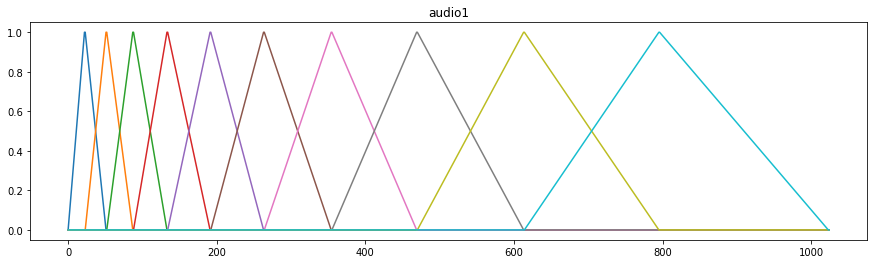

In [0]:
filters1 = get_filters(filter_points1, FFT_size)

plt.figure(figsize=(15,4))
plt.title("audio1")
for n in range(filters1.shape[0]):
    plt.plot(filters1[n])



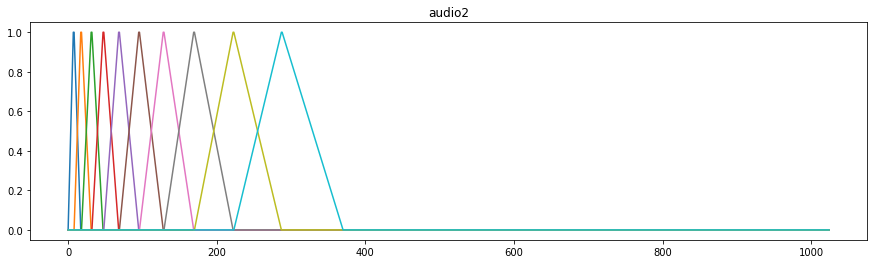

In [0]:
filters2 = get_filters(filter_points2, FFT_size)

plt.figure(figsize=(15,4))
plt.title("audio2")
for n in range(filters2.shape[0]):
    plt.plot(filters2[n])



Next we divide the triangular MEL weights by the width of the MEL band (area normalization). If we wont normalize the filters, we will see the noise increase with frequency because of the filter width.

In [0]:
enorm1 = 2.0 / (mel_freqs1[2:mel_filter_num+2] - mel_freqs1[:mel_filter_num])
filters1 *= enorm1[:, np.newaxis]


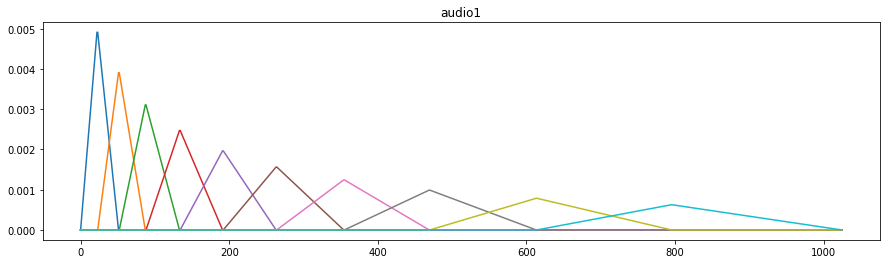

In [0]:
plt.figure(figsize=(15,4))
plt.title("audio1")
for n in range(filters1.shape[0]):
    plt.plot(filters1[n])



In [0]:
enorm2 = 2.0 / (mel_freqs2[2:mel_filter_num+2] - mel_freqs2[:mel_filter_num])
filters2 *= enorm2[:, np.newaxis]


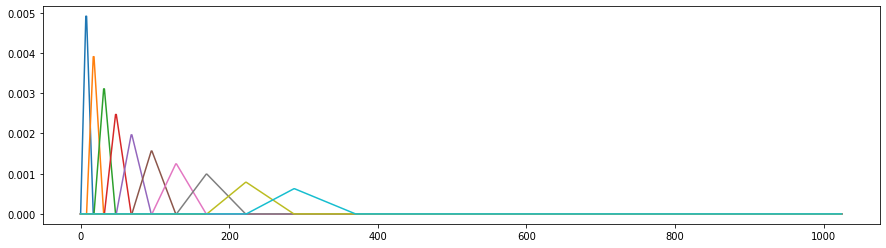

In [0]:
plt.figure(figsize=(15,4))
for n in range(filters2.shape[0]):
    plt.plot(filters2[n])



#filter the signal


In [0]:
audio_filtered1 = np.dot(filters1, np.transpose(audio_power1))
audio_log1 = 10.0 * np.log10(audio_filtered1)
audio_log1.shape


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


(10, 157)

In [0]:
audio_filtered2 = np.dot(filters2, np.transpose(audio_power2))
audio_log2 = 10.0 * np.log10(audio_filtered2)
audio_log2.shape


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


(10, 124)

In [0]:
def dct(dct_filter_num, filter_len):
    basis = np.empty((dct_filter_num,filter_len))
    basis[0, :] = 1.0 / np.sqrt(filter_len)
    
    samples = np.arange(1, 2 * filter_len, 2) * np.pi / (2.0 * filter_len)

    for i in range(1, dct_filter_num):
        basis[i, :] = np.cos(i * samples) * np.sqrt(2.0 / filter_len)
        
    return basis


In [0]:
dct_filter_num = 40

dct_filters = dct(dct_filter_num, mel_filter_num)

cepstral_coefficents1 = np.dot(dct_filters, audio_log1)
cepstral_coefficents1.shape

(40, 157)

In [0]:
cepstral_coefficents1[1:5,:]

array([[         nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,  -8.24012794,  -7.14023245,  -7.3174876 ,
         -7.68426905,  -8.06298168,  -8.23878317,  -7.58074831,
         -5.05594369,  -1.77375925,  -0.07887799,  -0.03412257,
         -0.57510384,  -1.29291467,  -2.02214454,  -2.24242701,
         -2.22425054,  -0.69880775,   2.20516097,   4.18266181,
          4.91996188,   4.16768625,  -5.67026418, -10.58128895,
        -11.20711659, -10.78665389,  -8.68859357,  -4.85764486,
         -0.49752536,   2.82990686,   4.6393227 ,   4.28651371,
          3.27151574,   3.37282893,   4.

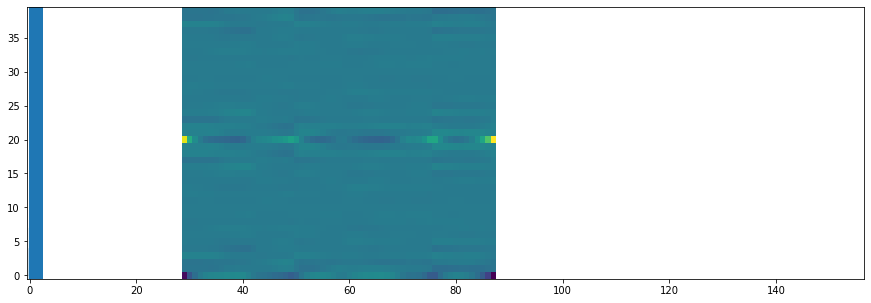

In [0]:
plt.figure(figsize=(15,5))
plt.plot(np.linspace(0, len(audio1) / sample_rate1, num=len(audio1)), audio1)
plt.imshow(cepstral_coefficents1, aspect='auto', origin='lower')

In [0]:
dct_filter_num = 40

dct_filters = dct(dct_filter_num, mel_filter_num)

cepstral_coefficents2 = np.dot(dct_filters, audio_log2)
cepstral_coefficents2.shape

(40, 124)

In [0]:
cepstral_coefficents2[1:5,:]

array([[         nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
         -5.35753156,  -6.79754999,  -6.85363852,  -7.19558295,
         -7.45297766,  -7.52759101,  -7.60713548,  -7.78154757,
         -7.81251597,  -7.44454828,  -6.72628665,  -5.95932149,
         -5.10751165,  -3.61543458,  -2.49699034,  -1.85508886,
         -1.30309438,  -0.05774863,   1.03755116,   1.62496237,
          1.83327405,  -1.53695995,  -4.18176903,  -3.03800223,
         -2.34239551,  -2.03059248,  -2.57992907,  -4.13020213,
         -5.69634929,  -6.15139203,  -4.8417081 ,  -3.13878071,
         -3.58361722,  -4.4233251 ,  -5.

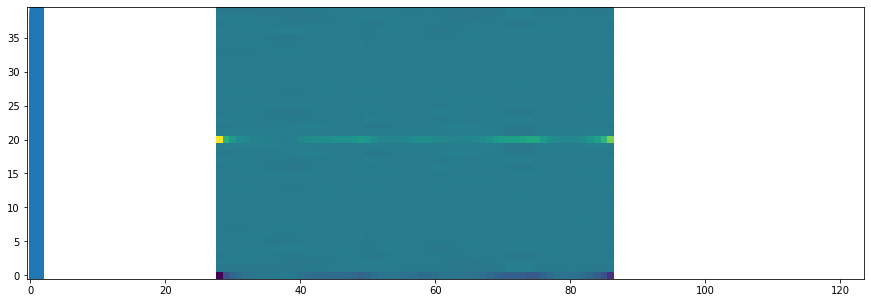

In [0]:
plt.figure(figsize=(15,5))
plt.plot(np.linspace(0, len(audio2) / sample_rate2, num=len(audio2)), audio2)
plt.imshow(cepstral_coefficents2, aspect='auto', origin='lower');



In [0]:
for i in range(cepstral_coefficents1.shape[0]):
  for j in range(cepstral_coefficents1.shape[1]):
    if math.isinf(cepstral_coefficents1[i][j]) or np.isnan(cepstral_coefficents1[i][j]):
      cepstral_coefficents1[i][j] = 0
cepstral_coefficents1[1:5,]

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  -8.24012794,  -7.14023245,  -7.3174876 ,
         -7.68426905,  -8.06298168,  -8.23878317,  -7.58074831,
         -5.05594369,  -1.77375925,  -0.07887799,  -0.03412257,
         -0.57510384,  -1.29291467,  -2.02214454,  -2.24242701,
         -2.22425054,  -0.69880775,   2.20516097,   4.18266181,
          4.91996188,   4.16768625,  -5.67026418, -10.58128895,
        -11.20711659, -10.78665389,  -8.68859357,  -4.85764486,
         -0.49752536,   2.82990686,   4.6393227 ,   4.28651371,
          3.27151574,   3.37282893,   4.

In [0]:
for i in range(cepstral_coefficents2.shape[0]):
  for j in range(cepstral_coefficents2.shape[1]):
    if math.isinf(cepstral_coefficents2[i][j]) or np.isnan(cepstral_coefficents2[i][j]):
      cepstral_coefficents2[i][j] = 0
cepstral_coefficents2[1:5,]

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         -5.35753156,  -6.79754999,  -6.85363852,  -7.19558295,
         -7.45297766,  -7.52759101,  -7.60713548,  -7.78154757,
         -7.81251597,  -7.44454828,  -6.72628665,  -5.95932149,
         -5.10751165,  -3.61543458,  -2.49699034,  -1.85508886,
         -1.30309438,  -0.05774863,   1.03755116,   1.62496237,
          1.83327405,  -1.53695995,  -4.18176903,  -3.03800223,
         -2.34239551,  -2.03059248,  -2.57992907,  -4.13020213,
         -5.69634929,  -6.15139203,  -4.8417081 ,  -3.13878071,
         -3.58361722,  -4.4233251 ,  -5.

# **Cosine Similarity**

### 1. By Sci-Kit Learn Library
### 2. By User Defined Function


      compute cosine similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)
      COS(O) = v1 . v2 / |v1|.|v2|


In [0]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(cepstral_coefficents1, cepstral_coefficents2[:,0:171])

ValueError: ignored

In [0]:
def cosine_similar(v1,v2):
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]
        y = v2[i]
        sumxx += sum(x*x)
        sumyy += sum(y*y)
        sumxy += sum(x*y)
    return sumxy/math.sqrt(sumxx*sumyy)

In [0]:
if cepstral_coefficents1.shape[1] < cepstral_coefficents2.shape[1]:
  th = cosine_similar(cepstral_coefficents1,cepstral_coefficents2[:,0:cepstral_coefficents1.shape[1]])
else:
  th = cosine_similar(cepstral_coefficents1[:,0:cepstral_coefficents2.shape[1]],cepstral_coefficents2)
th

0.36767691155601256

# **Cross Correlation**
      $$norm\_corr(x,y)=\dfrac{\sum_{n=0}^{n-1} x[n]*y[n]}{\sqrt{\sum_{n=0}^{n-1} x[n]^2 * \sum_{n=0}^{n-1} y[n]^2}}$$

In [0]:
from scipy.signal import correlate
correlate(cepstral_coefficents1,cepstral_coefficents2[:,0:171],mode='same', method='fft').shape

(40, 101)

# **Auto Correlation**

In [0]:
np.correlate(cepstral_coefficents1,cepstral_coefficents2[:,0:171],mode='same')